In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg


In [8]:
# Define directories for training and testing data
base_dir = 'archive'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')


In [9]:
# Define image dimensions and batch size
img_width, img_height = 48, 48
batch_size = 32


In [10]:
# Create ImageDataGenerator for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [11]:
# Generate training and testing datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale')


Found 24176 images belonging to 5 classes.
Found 6043 images belonging to 5 classes.


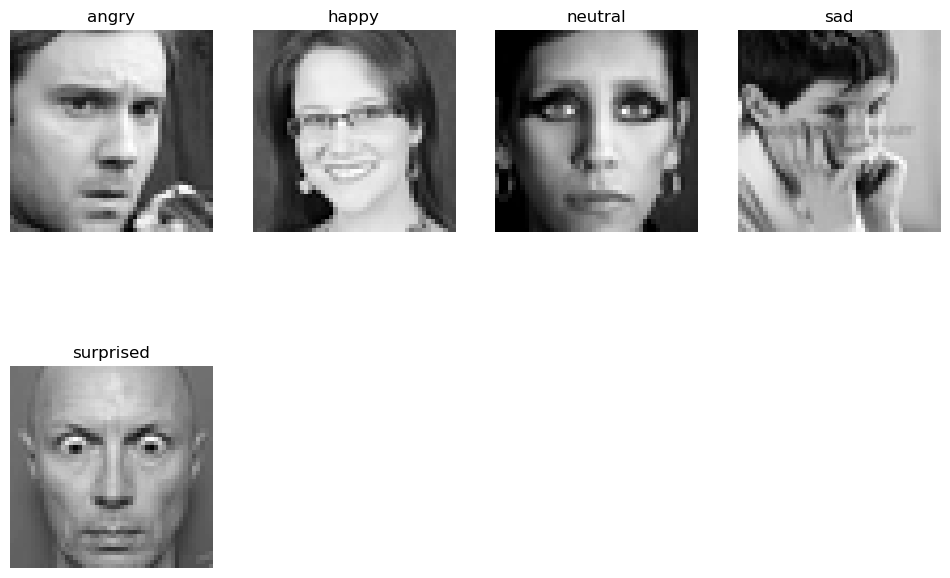

In [12]:
# Display sample images for different emotions
emotions = ['angry', 'happy', 'neutral', 'sad', 'surprised']

plt.figure(figsize=(12, 8))
for i, emotion in enumerate(emotions, start=1):
    img_path = os.path.join(train_dir, emotion, os.listdir(os.path.join(train_dir, emotion))[0])
    img = mpimg.imread(img_path)
    plt.subplot(2, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')

plt.show()


In [13]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

C:\Users\SOUMYADEEP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Train the model
history = model.fit(train_generator, epochs=50, validation_data=test_generator)


Epoch 1/50


C:\Users\SOUMYADEEP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


756/756 ━━━━━━━━━━━━━━━━━━━━ 389s 511ms/step - accuracy: 0.3193 - loss: 1.5291 - val_accuracy: 0.4996 - val_loss: 1.2316
Epoch 2/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.5040 - loss: 1.2175 - val_accuracy: 0.5587 - val_loss: 1.0990
Epoch 3/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.5566 - loss: 1.1025 - val_accuracy: 0.5782 - val_loss: 1.0277
Epoch 4/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.6023 - loss: 1.0095 - val_accuracy: 0.6115 - val_loss: 0.9793
Epoch 5/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.6329 - loss: 0.9477 - val_accuracy: 0.6229 - val_loss: 0.9483
Epoch 6/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.6498 - loss: 0.9033 - val_accuracy: 0.6383 - val_loss: 0.9140
Epoch 7/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.6658 - loss: 0.8616 - val_accuracy: 0.6432 - val_loss: 0.9186
Epoch 8/50
756/756 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.6818 - loss: 0.8214 - val_accur

189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6368 - loss: 2.3714
Test Loss: 2.3534188270568848
Test Accuracy: 0.6366043090820312


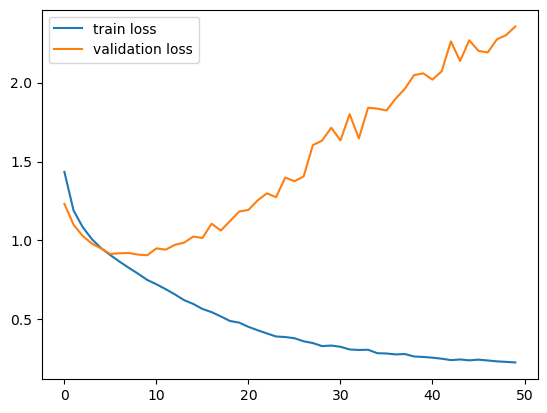

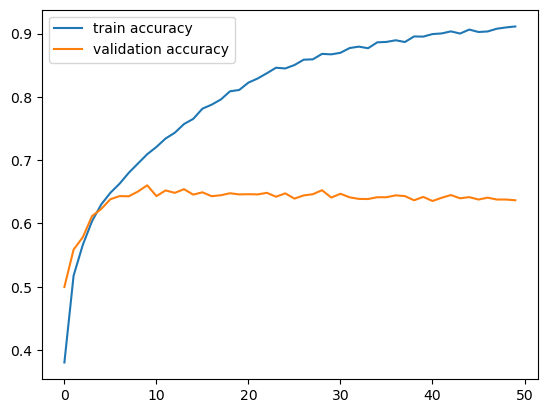

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plotting loss and accuracy
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()


In [17]:
def predict_emotion(image_path):
    img = image.load_img(image_path, target_size=(img_width, img_height), color_mode='grayscale')
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    emotion_labels = ['angry', 'happy', 'neutral', 'sad', 'surprised']
    predicted_class = np.argmax(prediction)
    predicted_emotion = emotion_labels[predicted_class]
    return predicted_emotion


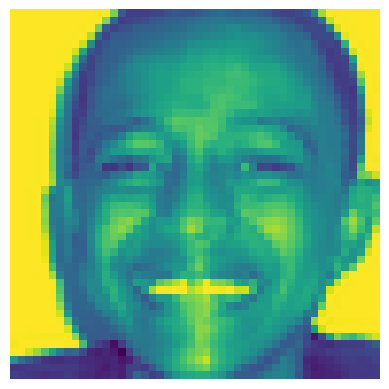

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Emotion: happy


In [24]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/happy/im17.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/happy/im17.png')
print("Predicted Emotion:", prediction)

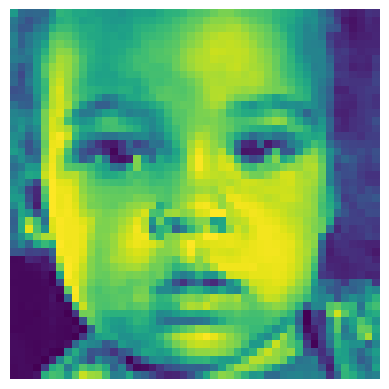

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Emotion: angry


In [25]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/neutral/im292.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/neutral/im292.png')
print("Predicted Emotion:", prediction)

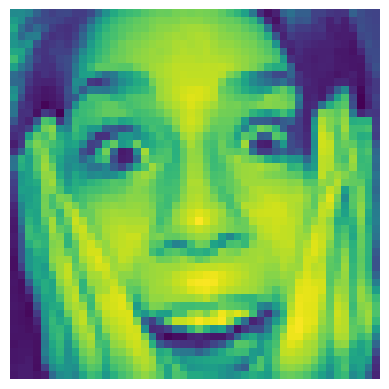

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Emotion: surprised


In [26]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/surprised/im141.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/surprised/im141.png')
print("Predicted Emotion:", prediction)

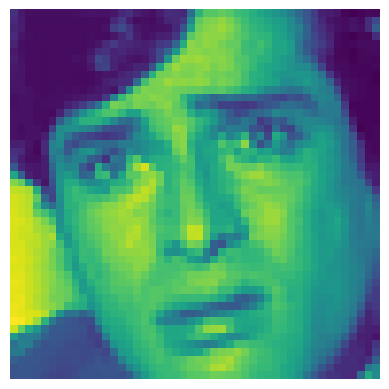

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Emotion: sad


In [27]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/sad/im1060.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/sad/im1060.png')
print("Predicted Emotion:", prediction)

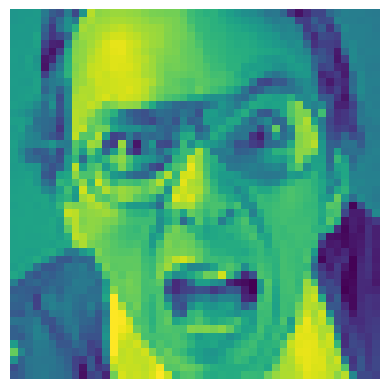

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Emotion: surprised


In [28]:
# Load and display the specified image
img = tf.keras.preprocessing.image.load_img('archive/test/angry/im204.png', target_size=(img_width, img_height), color_mode='grayscale')
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values to [0, 1]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Predict emotion for the specified image
prediction = predict_emotion('archive/test/angry/im204.png')
print("Predicted Emotion:", prediction)